In [1]:
import tensorflow as tf
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 18258968595231459162,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 9816436241720098664
 physical_device_desc: "device: XLA_CPU device",
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 4985044352
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12127227614557882974
 physical_device_desc: "device: 0, name: GeForce GTX 1660 SUPER, pci bus id: 0000:06:00.0, compute capability: 7.5",
 name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 3750131139645084680
 physical_device_desc: "device: XLA_GPU device"]

In [2]:
tf.__version__

'2.2.0'

In [3]:
tf.debugging.set_log_device_placement(True)

In [4]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras import optimizers, initializers, regularizers, metrics
from keras.callbacks import ModelCheckpoint
import os
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from numpy import expand_dims
from keras import models
from keras import layers
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.python.keras.layers import Dense, Dropout, Input
from tensorflow.python.keras.models import Model
from tensorflow.keras.layers import Input, Dense

model = models.Sequential()
#1층
model.add(Conv2D(input_shape=(224,224,3), filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
#2층
model.add(Conv2D(input_shape=(224,224,64),filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
#Max Pooling
model.add(MaxPooling2D(pool_size =(2,2), strides=(2,2)))
#3층
model.add(Conv2D(input_shape=(112,112,64),filters=128, kernel_size=(3,3), strides=(1,1), padding ='same', activation='relu'))
#4층
model.add(Conv2D(input_shape=(112,112,128),filters=128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
#Max Pooling
model.add(MaxPooling2D(pool_size =(2,2), strides=(2,2)))
#5층
model.add(Conv2D(input_shape=(56,56,128), filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
#6층
model.add(Conv2D(input_shape=(56,56,256), filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
#7층
model.add(Conv2D(input_shape=(56,56,256), filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
#Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#8층
model.add(Conv2D(input_shape=(28,28,256), filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
#9층
model.add(Conv2D(input_shape=(28,28,512), filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
#10층
model.add(Conv2D(input_shape=(28,28,512), filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
#Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#11층
model.add(Conv2D(input_shape=(14,14,512), filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
#12층
model.add(Conv2D(input_shape=(14,14,512), filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
#13층
model.add(Conv2D(input_shape=(14,14,512), filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
#Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#14층 (fc1)
model.add(Flatten())
model.add(Dense(4096,activation='relu'))
#15층 (fc2)
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2048,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/tas

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

In [5]:
###vgg16으로 custom data training해보기###
# cats and dogs dataset 활용

In [6]:


train_dir = 'C:/Users/user/Desktop/catsanddogs/training_set/training_set'
test_dir = 'C:/Users/user/Desktop/catsanddogs/test_set/test_set'

# 폴더에 따라 자동 분류
train_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

# 데이터 구조 생성
train_data_gen = train_image_generator.flow_from_directory(batch_size=16,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(224, 224),
                                                           class_mode='binary')

test_data_gen = test_image_generator.flow_from_directory(batch_size=16,
                                                         directory=test_dir,
                                                         target_size=(224, 224),
                                                         class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [7]:
keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0


Instructions for updating:
Please use Model.fit, which supports generators.
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 1/10
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing

501/501 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.4958Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_3742 in device /job:localhost/replica:0/task:0/device:GPU:0
501/501 [==============================] - 149s 298ms/step - loss: 0.6931 - accuracy: 0.4958 - val_loss: 0.6931 - val_accuracy: 0.5002
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelD

Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
501/501 [==============================] - 213s 425ms/step - loss: 0.6931 - accuracy: 0.5034 - val_loss: 0.6931 - val_accuracy: 0.4998
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 10/10
501/501 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.4921Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeData

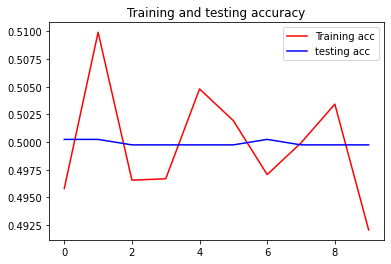

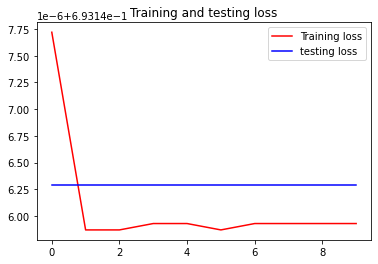

In [8]:
history = model.fit_generator(
    train_data_gen, epochs=10,
    validation_data=test_data_gen,
    )

# 최종 결과 리포트
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

from matplotlib import pyplot as plt

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='testing acc')
plt.title('Training and testing accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='testing loss')
plt.title('Training and testing loss')
plt.legend()

plt.show()


In [15]:
from keras.applications.vgg16 import VGG16
model = VGG16()

In [16]:
from keras.utils.vis_utils import plot_model
print(model.summary())
plot_model(model, to_file='vgg.png')

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [17]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
image = load_img('dog.1.jpg', target_size=(224, 224)) #Load image
image = img_to_array(image) # Convert to numpy array
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2])) # reshape data for the model
image = preprocess_input(image) # prepare the image for the VGG model

In [18]:
from keras.applications.vgg16 import decode_predictions
yhat = model.predict(image)
label = decode_predictions(yhat)    # convert the probabilities to class labels
label = label[0][0]                  # retrieve the most likely result, e.g. highest probability
print('%s (%.2f%%)' % (label[1], label[2]*100))    # print the classification


Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_predict_function_16895 in device /job:localhost/replica:0/task:0/de

In [21]:
image = load_img('cat.27.jpg', target_size=(224, 224)) #Load image
image = img_to_array(image) # Convert to numpy array
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2])) # reshape data for the model
image = preprocess_input(image) # prepare the image for the VGG model
yhat = model.predict(image)
label = decode_predictions(yhat)    # convert the probabilities to class labels
label = label[0][0]                  # retrieve the most likely result, e.g. highest probability
print('%s (%.2f%%)' % (label[1], label[2]*100))    # print the classification

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
tabby (40.94%)


In [22]:
###전이학습으로 해보자###

In [23]:
train_dir = 'C:/Users/user/Desktop/catsanddogs/training_set/training_set'
test_dir = 'C:/Users/user/Desktop/catsanddogs/test_set/test_set'

# 폴더에 따라 자동 분류
train_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

# 데이터 구조 생성
train_data_gen = train_image_generator.flow_from_directory(batch_size=16,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(224, 224),
                                                           class_mode='binary')

test_data_gen = test_image_generator.flow_from_directory(batch_size=16,
                                                         directory=test_dir,
                                                         target_size=(224, 224),
                                                         class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [29]:
#설계된 모델의 w,b를 업데이트하지않게하기

for layer in model.layers:
    layer.trainable = False
    
#block5_pool까지가 물체의 특징을 뽑아내는 층이라서 여기까지만 사용
vgg_maxpool5 = model.get_layer('block5_pool').output

FeatureFlatten = Flatten()(vgg_maxpool5)

dense = Dense(10,name='dense', activation='relu')(FeatureFlatten)
predictions = Dense(1,activation = 'sigmoid')(dense)

New_VGGmodel = Model(inputs=model.input, outputs=predictions)
New_VGGmodel.compile(optimizer = 'rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
New_VGGmodel.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [30]:
history = New_VGGmodel.fit_generator(train_data_gen, steps_per_epoch=10,
                                    epochs=30, validation_data = test_data_gen, validation_steps=50)

Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 1/30
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 8/30
10/10 [==============================] - ETA: 0s - loss: 0.5434 - accuracy: 0.7688Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
10/10 [==============================] - 5s 474ms/step - loss: 0.5434 - accuracy: 0.7688 - val_loss: 0.5665 - val_accuracy: 0.7113
Executing op OptimizeDataset in 

Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
10/10 [==============================] - 6s 648ms/step - loss: 0.4818 - accuracy: 0.8562 - val_loss: 0.4909 - val_accuracy: 0.8700
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 17/30
10/10 [==============================] - ETA: 0s - loss: 0.4239 - accuracy: 0.8375Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in

Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 25/30
10/10 [==============================] - ETA: 0s - loss: 0.4427 - accuracy: 0.8625Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
10/10 [==============================] - 8s 834ms/step - loss: 0.4427 - accuracy: 0.8625 - val_loss: 0.4513 - val_accuracy: 0.8863
Executing op OptimizeDataset in

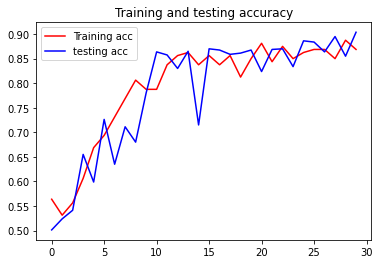

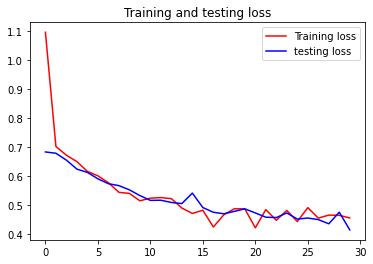

In [31]:
# 최종 결과 리포트
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

from matplotlib import pyplot as plt

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='testing acc')
plt.title('Training and testing accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='testing loss')
plt.title('Training and testing loss')
plt.legend()

plt.show()

In [ ]:
testSet=